In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import string

In [6]:
pbgc_df = pd.read_csv('pbgc_data/trusteedplans.csv')

In [20]:
pbgc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 9 columns):
CASE_NUMBER                                           4888 non-null int64
SPONSOR NAME                                          4888 non-null object
PLAN NAME                                             4888 non-null object
CITY                                                  4855 non-null object
STATE                                                 4853 non-null object
DATE OF PLAN TERMINATION                              4888 non-null datetime64[ns]
DATE OF PBGC TRUSTEESHIP                              4888 non-null datetime64[ns]
NUMBER OF PARTICIPANTS AT DATE OF PLAN TERMINATION    4878 non-null object
year of term                                          4888 non-null int64
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 343.8+ KB


In [25]:
pbgc_df['NUMBER OF PARTICIPANTS AT DATE OF PLAN TERMINATION'] = pbgc_df['NUMBER OF PARTICIPANTS AT DATE OF PLAN TERMINATION'].str.replace(',','')

pbgc_df['NUMBER OF PARTICIPANTS AT DATE OF PLAN TERMINATION'] = pd.to_numeric(pbgc_df['NUMBER OF PARTICIPANTS AT DATE OF PLAN TERMINATION'])
pbgc_df['DATE OF PBGC TRUSTEESHIP'] = pd.to_datetime(pbgc_df['DATE OF PBGC TRUSTEESHIP'])
pbgc_df['DATE OF PLAN TERMINATION'] = pd.to_datetime(pbgc_df['DATE OF PLAN TERMINATION'])

In [26]:
pbgc_df['year of term'] = pbgc_df['DATE OF PLAN TERMINATION'].dt.year

In [28]:
pbgc_term_ptp_by_year = pbgc_df.groupby('year of term')['NUMBER OF PARTICIPANTS AT DATE OF PLAN TERMINATION'].sum()

In [31]:
pbgc_term_ptp_by_year.index

Int64Index([1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016, 2017, 2018],
           dtype='int64', name='year of term')

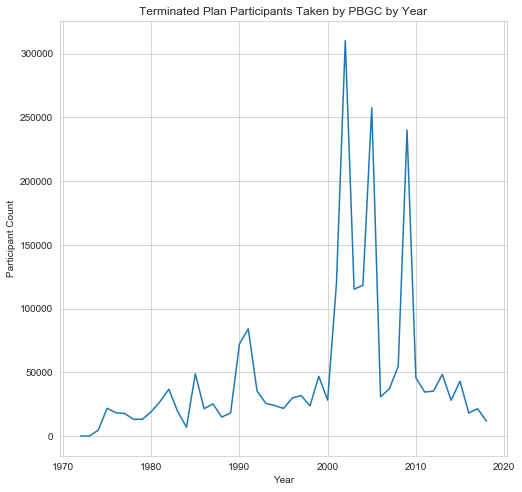

In [33]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax = sns.lineplot(x=pbgc_term_ptp_by_year.index, y=pbgc_term_ptp_by_year)
plt.title('Terminated Plan Participants Taken by PBGC by Year')
plt.xlabel('Year')
plt.ylabel('Participant Count')
plt.show()

In [34]:
pbgc_sel = pd.read_csv('pbgc_data/singleemployerlist.csv')

In [36]:
pbgc_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24184 entries, 0 to 24183
Data columns (total 9 columns):
Pension Plan Name            24184 non-null object
City                         24174 non-null object
State                        24155 non-null object
Pension Plan Sponsor Name    24184 non-null object
Administrator Phone No       24184 non-null object
Plan Effective               24184 non-null object
Pension Plan EIN             24184 non-null int64
Pension Plan PN              24184 non-null int64
Participant Count            24184 non-null int64
dtypes: int64(3), object(6)
memory usage: 1.7+ MB


In [38]:
pbgc_sel['Plan Effective'] = pd.to_datetime(pbgc_sel['Plan Effective'])

In [39]:
pbgc_sel

,Pension Plan Name,City,State,Pension Plan Sponsor Name,Administrator Phone No,Plan Effective,Pension Plan EIN,Pension Plan PN,Participant Count
0,BROOKLYN DOLL CO. INC. RETIREMENT TRUST,Brooklyn,NY,Brooklyn Doll Co. Inc.,2124949063,1984-12-28,111735219,1,0
1,WILLIAM MCLEOD GENERAL CONTRACTING INC. CASH ...,Carmel,CA,William McLeod General Contracting Inc.,5413387631,2014-01-01,770556290,2,6
2,LEWIS RIVER NURSERY INC. CASH BALANCE PLAN,Woodland,WA,Lewis River Nursery Inc.,5413387631,2007-01-01,911690093,3,5
3,ENTRADA LODGE INC. CASH BALANCE PLAN,Bend,OR,Entrada Lodge,5413387631,2007-01-01,930748505,2,19
4,RIVERSIDE INTERESTS INC. DEFINED BENEFIT PENS...,Palo Alto,CA,Riverside Interests Inc.,4089798024,2005-02-01,770037743,1,3
5,CASES-CASES INC. CASH BALANCE PENSION PLAN,Wakefield,MA,Cases-Cases Inc.,7812455144,2010-01-01,43414740,3,5
6,LOVE QUOTES INC. PENSION PLAN,New York,NY,LOVE QUOTES INC.,2124756425,2008-01-01,200793516,1,2
7,HORISONS UNLIMITED CASH BALANCE PLAN,Merced,CA,Horisons Unlimited,2097696594,2012-01-01,721532350,1,29
8,Como Design 412 Fully Insured Defined Benefit ...,Los Angeles,CA,Como Design,2137454000,2007-12-01,680545150,1,2
9,J. R. JAMES BROKERAGE COMPANY INC. DEFINED BE...,Albany,GA,J. R. James Brokerage Company Inc.,2298887395,2007-01-01,540678320,4,6
